# Efficiency Plots LIANA+

In [1]:
import pandas as pd
import plotnine as p9
import patchworklib as pw
import os

<Figure size 100x100 with 0 Axes>

In [2]:
def efficiency_plot(benchmark_stats, color_label, plot_label):
    benchmark_stats = benchmark_stats.copy()
    dataset_dict = { k: f"{int(k/1000)}k" if k!=164000 else "Xenium 164k" for k in benchmark_stats['dataset'].unique()}
    benchmark_stats['dataset'] = benchmark_stats['dataset'].astype('category')
    benchmark_stats['dataset'] = benchmark_stats['dataset'].replace(dataset_dict).astype('category')
    benchmark_stats['time'] = benchmark_stats['time'] / 60 # to minutes

    # Group the data and calculate the median and standard deviation
    grouped_stats = benchmark_stats.groupby(['method', 'dataset']).agg(
        x_median=('memory', 'median'),
        y_median=('time', 'median'),
        x_std=('memory', 'std'),
        y_std=('time', 'std')
    ).reset_index()

    # Create the plot
    plot = (
        p9.ggplot(grouped_stats, p9.aes(x="x_median", y="y_median", color="method", fill='method')) + 
        p9.scale_fill_brewer(type="qual", palette="Dark2", guide=False) +
        p9.scale_color_brewer(type="qual", palette="Dark2") +
        p9.geom_point(size=2) +
        p9.theme_bw() +
        p9.facet_grid("~ dataset" ) +
        p9.labs(x="Peak Total RAM Used (MB)", y="Time (Minutes)", color=color_label) +
        p9.ggtitle(plot_label) +
        p9.theme(axis_text_x = p9.element_text(angle = 90, size=12), 
                 axis_text_y = p9.element_text(size=12), 
                 axis_title_x = p9.element_text(size=14, weight='regular'),
                 axis_title_y = p9.element_text(size=14, weight='regular'),
                 strip_background=p9.element_rect(fill="white"),
                 legend_text = p9.element_text(size=12),
                 legend_title=p9.element_text(size=14),
                 legend_key = p9.element_rect(fill="white", colour="white"),
                 strip_text=p9.element_text(size=15, colour="black"),
                 figure_size=(8, 3),
                 # make title larger, and shift it up and left
                 title=p9.element_text(size=20, weight='bold', margin={'t': 10, 'r': 10}, x=-0.075, y=1.1),
                 
                 )
    )
    
    return plot

In [3]:
def plot_benchmark(benchmark_stats, title):
    benchmark_stats = benchmark_stats.copy()
    benchmark_stats['time'] = benchmark_stats['time'] / 60 # to minutes
    benchmark_stats['n_views'] = benchmark_stats['n_views'].astype(int).astype('category')
    p = (p9.ggplot(benchmark_stats, p9.aes('memory', 'time', color='factor(n_views)')) +
        p9.geom_point(size=3, shape='o') +
        p9.scale_color_brewer(type='div', palette='Spectral') +
        p9.theme_bw() +
        p9.labs(x="Peak Total RAM Used (MB)", y="Time (Minutes)", color="Number of Views") +
        p9.ggtitle(title) +
        p9.theme(axis_text_x = p9.element_text(angle = 90, size=12), 
                    axis_text_y = p9.element_text(size=12), 
                    axis_title_x = p9.element_text(size=12, weight='regular'),
                    axis_title_y = p9.element_text(size=12, weight='regular'),
                    strip_background=p9.element_rect(fill="white"),
                    legend_text = p9.element_text(size=12),
                    legend_title=p9.element_text(size=12),
                    legend_key = p9.element_rect(fill="white", colour="white"),
                    strip_text=p9.element_text(size=12, colour="black"),
                    figure_size=(4, 3),
                    # make title larger, and shift it up and left
                    title=p9.element_text(size=20, weight='bold', x=-0.075, y=1.1)
                    )
        )
    return p

## Single-Cell

In [4]:
benchmark_stats = pd.read_csv("sc_stats.csv")

In [5]:
# Move to folder that gets convert to excel
benchmark_stats.to_csv(os.path.join("..", "..", "figures", "source", "Sufig1A.csv"))

In [6]:
p1 = pw.load_ggplot(efficiency_plot(benchmark_stats, color_label="Method", plot_label="A)"))

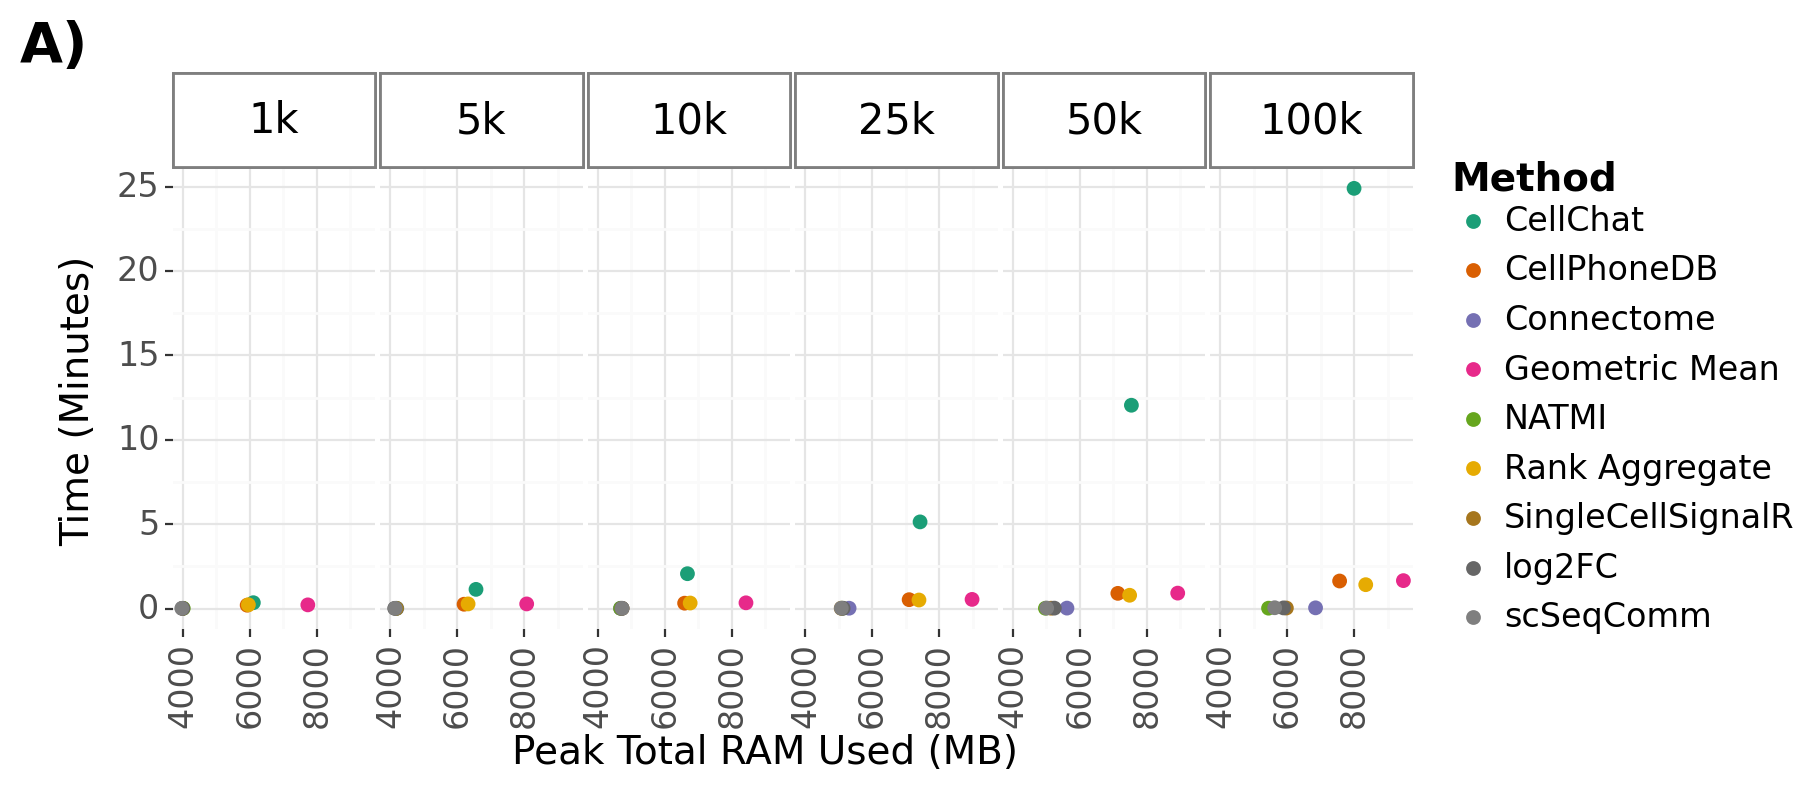

In [7]:
p1

## Local Scores

In [8]:
benchmark_stats = pd.read_csv("sp_stats.csv")

In [9]:
# Move to folder that gets convert to excel
benchmark_stats.to_csv(os.path.join("..", "..", "figures", "source", "Sufig1B.csv"))

In [10]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             'product': 'Product',
             'norm_product': 'Normalized product'
             }
benchmark_stats['method'] = benchmark_stats['method'].map(name_dict)
benchmark_stats['method'] = pd.Categorical(benchmark_stats['method'], categories=name_dict.values())

In [11]:
p2 = pw.load_ggplot(efficiency_plot(benchmark_stats, color_label="Local Score", plot_label="B)"))

## Factorisation

In [12]:
benchmark_stats = pd.read_csv("factor_stats.csv")
benchmark_stats.to_csv(os.path.join("..", "..", "figures", "source", "Sufig1C.csv"))

In [13]:
p3 = plot_benchmark(benchmark_stats, title="C)")
p3 = pw.load_ggplot(p3)

## MISTy

In [14]:
benchmark_stats = pd.read_csv("learn_stats.csv")
benchmark_stats.to_csv(os.path.join("..", "..", "figures", "source", "Sufig1D.csv"))

In [15]:
p4 = plot_benchmark(benchmark_stats, title="D)")
p4 = pw.load_ggplot(p4)

## Append

In [16]:
p = (p1 / p2) / (p3 + p4)

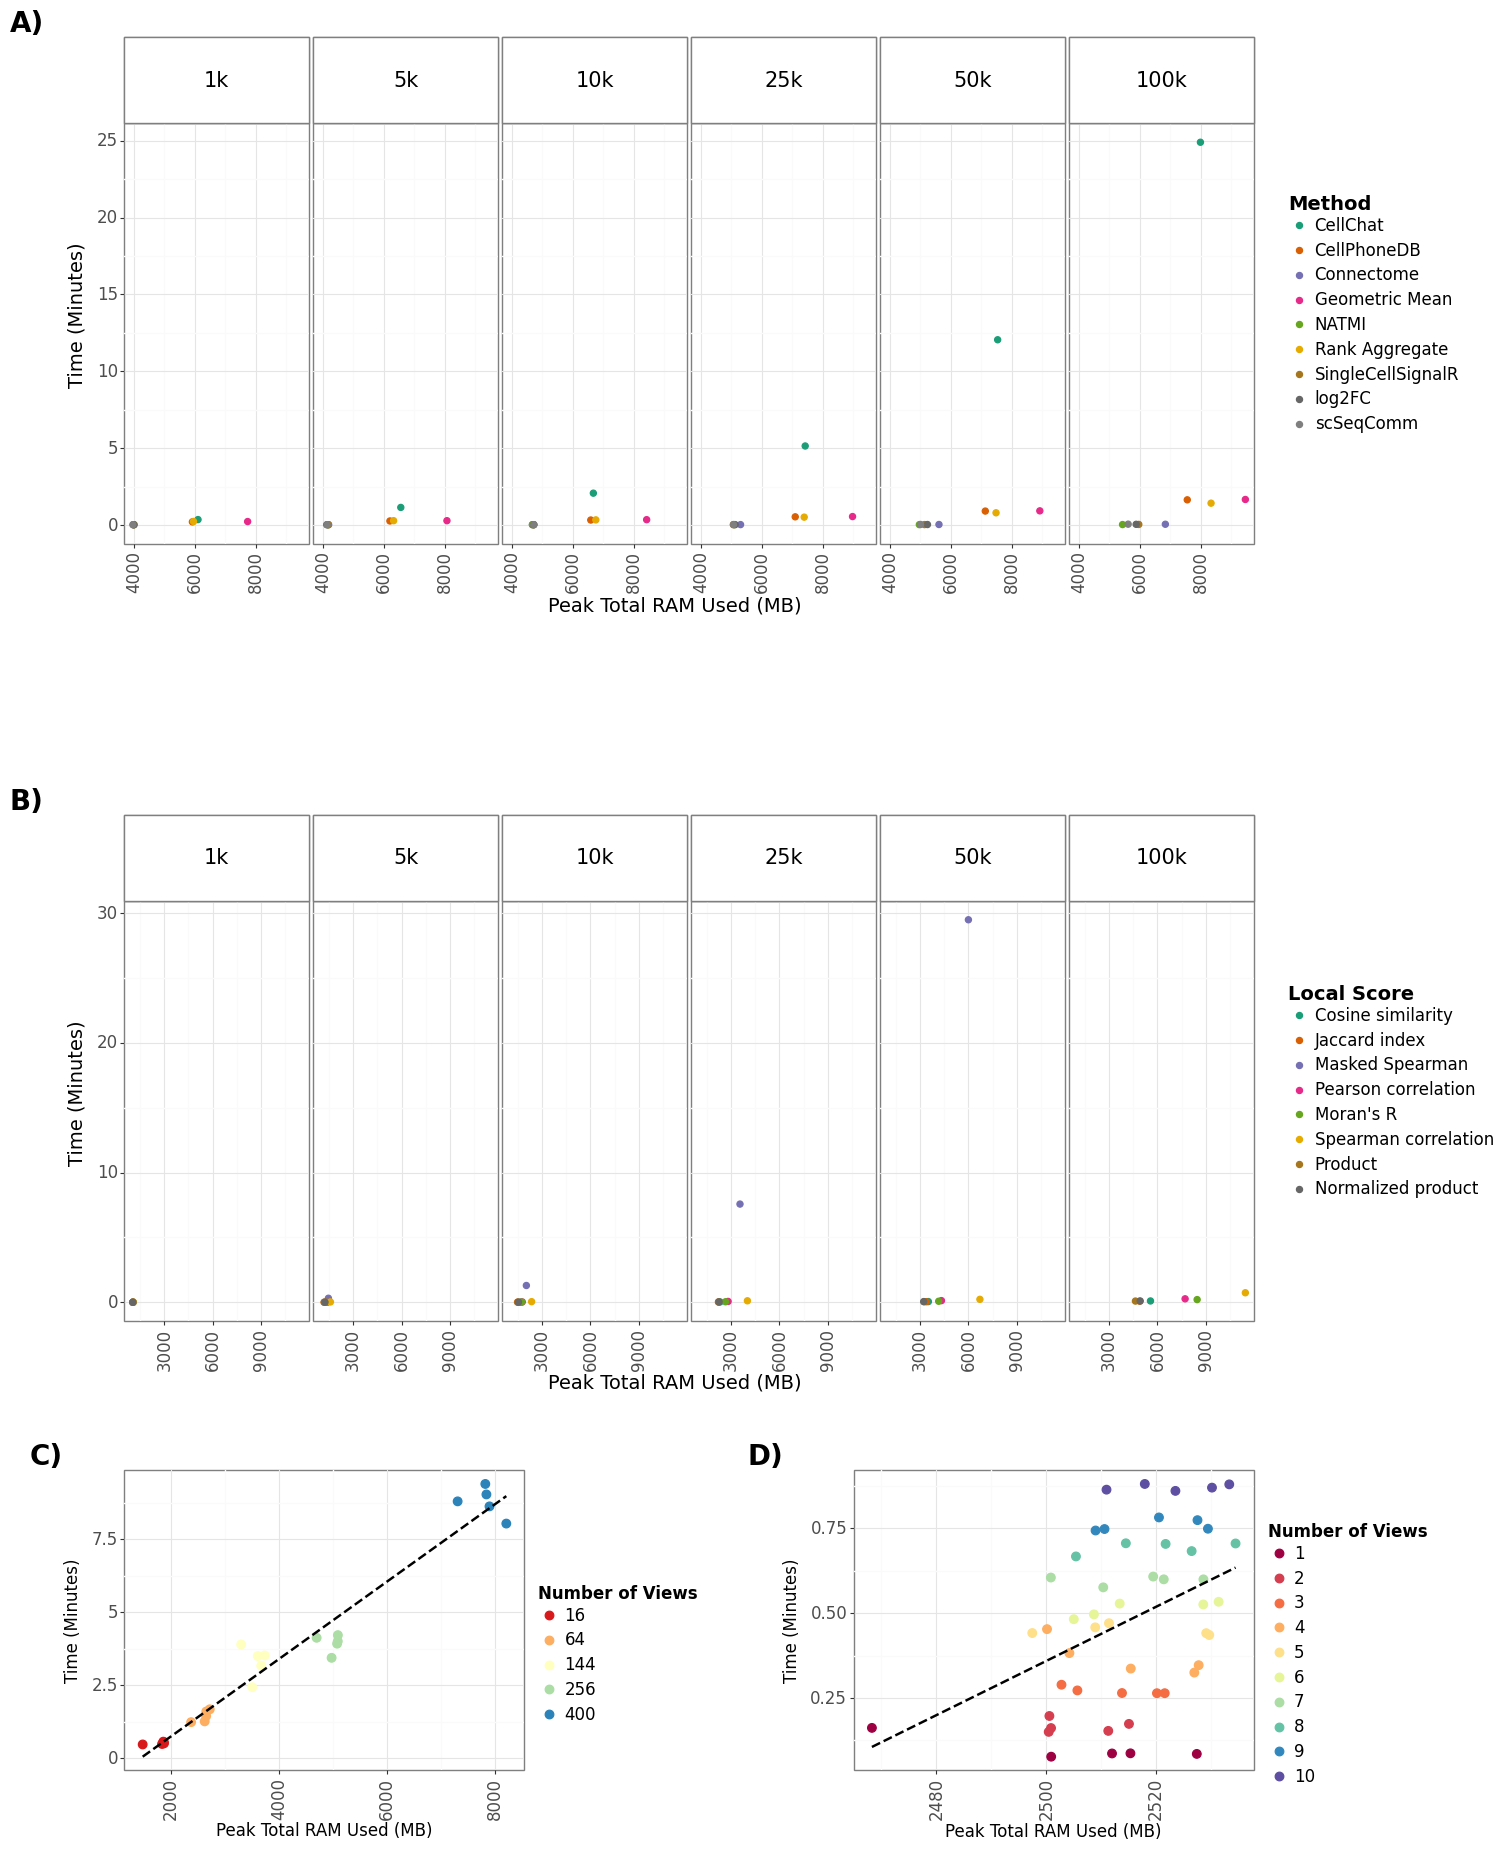

In [17]:
p.savefig("efficiency_plot.pdf")